# Explanation of this Notebook

The goal of this notebook is to explore the dataset and have better comprehesion of it

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "../data/raw/bank-additional-full.csv"
df = pd.read_csv(file_path, sep=';')

# Afficher les 5 premières lignes
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## DF_Info & DF_Describe

In [ ]:
# Aperçu général du dataset
df.info()

# Résumé statistique des données numériques
df.describe()

# Affichage des colonnes et de leurs types
print(df.columns)


In [ ]:
# Vérifier les valeurs manquantes
missing_values = df.isnull().sum()
print(missing_values)

# Visualiser les valeurs manquantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Carte de chaleur des valeurs manquantes")
plt.show()


In [ ]:
# Liste des variables catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns
print("Variables catégorielles :", categorical_cols)

# Afficher les valeurs uniques pour chaque variable catégorielle
for col in categorical_cols:
    print(f"\n{col} : {df[col].unique()}")


In [ ]:

# Définir la taille de la figure
plt.figure(figsize=(15, 20))

# Parcourir chaque variable catégorielle et tracer un graphique de fréquence
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 2 + 1, 2, i + 1)
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Fréquence des valeurs pour '{col}'")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

# Ajuster l'espacement entre les graphiques
plt.tight_layout()
plt.show()

In [ ]:
# Afficher les histogrammes des variables numériques
df.hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution des variables numériques")
plt.show()


In [ ]:
# Compter les valeurs de la variable cible
target_counts = df['y'].value_counts()
print(target_counts)

# Visualiser la distribution de la variable cible
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title("Distribution de la variable cible (y)")
plt.xlabel("Souscription à un dépôt à terme")
plt.ylabel("Nombre d'observations")
plt.show()


1. Analyse de la variable cible (y)

    La variable cible est très déséquilibrée :
        La majorité des clients ont répondu "no" (ne pas souscrire au dépôt à terme).
        Très peu de clients ont répondu "yes" (souscription).
    Conséquence : Nous devons prendre en compte cet déséquilibre de classe lors de la modélisation (exemple : ajuster les poids des classes, utiliser des techniques de sur-échantillonnage comme SMOTE, ou utiliser des métriques adaptées comme le F1-score ou le Recall).

2. Analyse des variables catégorielles

    Job : Les catégories "admin.", "blue-collar" et "technician" sont les plus fréquentes. Les autres catégories, comme "student" ou "unemployed", sont moins représentées.
    
    Marital : La majorité des clients sont "married". Les clients "divorced" et "single" sont moins fréquents.
    
    Education : Les clients ayant un "university degree" et un "high school" sont les plus nombreux. Il y a une proportion non négligeable d'éducation "unknown", ce qui peut nécessiter un traitement spécifique.
    
    Default, Housing, Loan : La plupart des clients n'ont pas de crédits en défaut, et environ la moitié ont un prêt immobilier ("housing loan").
    
    Contact : La majorité des contacts sont réalisés via "cellular", tandis que "telephone" est moins fréquent.
    
    Month et Day of Week : La distribution des mois montre un pic important en "May", suivi de "July" et "August". Cela peut indiquer une saisonnalité dans les campagnes marketing.
    
    Poutcome : La plupart des clients n'ont pas participé aux campagnes précédentes ("nonexistent").

Observations générales :

    Les variables catégorielles présentent une forte hétérogénéité, et certaines catégories sont rares ("unknown"), ce qui peut influencer la performance des modèles.
    Il peut être nécessaire d'encoder les variables catégorielles avec One-Hot Encoding ou d'utiliser des techniques de Target Encoding.

3. Analyse des variables numériques

    Age : La distribution est asymétrique à droite, avec un pic autour de 30-40 ans. Il y a quelques clients plus âgés (> 80 ans).
    
    Duration : Distribution fortement asymétrique à droite. La majorité des durées sont courtes (inférieures à 500 secondes). Cette variable est hautement corrélée avec la cible et ne doit pas être utilisée pour la prédiction dans un contexte réaliste.
    
    Campaign : La plupart des clients n'ont été contactés qu'une seule fois durant la campagne.
    
    Pdays : Il y a un pic massif à la valeur 999, ce qui signifie que le client n'a pas été contacté auparavant. Cela crée une variable binaire implicite (contacté ou non).
    
    Previous : La majorité des clients n'ont pas été contactés lors de campagnes précédentes, ce qui est aligné avec "pdays".
    Indices économiques (emp.var.rate, cons.price.idx, euribor3m, nr.employed) : Ces variables montrent des variations distinctes, reflétant probablement les conditions macroéconomiques durant la période d'étude.

Observations générales :

    Plusieurs variables numériques ont des distributions asymétriques ou contiennent des valeurs atypiques (outliers).
    Pdays nécessite un traitement particulier (par exemple, créer une variable binaire).
    Les indices économiques peuvent nécessiter une normalisation ou une standardisation pour une meilleure convergence des modèles.

Prochaines étapes :

    Traitement des valeurs manquantes : Remplacer les "unknown" par des valeurs imputées ou une catégorie dédiée.
    Encodage des variables catégorielles : Utiliser One-Hot Encoding ou Target Encoding.
    Normalisation/Standardisation : Appliquer une normalisation sur les variables numériques avec des distributions très asymétriques.

## Imputation

 on impute less valeurs unknown par les valeurs les plus cohérentes pour ces denières via un knn pour conserver une cohérence

In [ ]:
# Liste des variables catégorielles
categorical_cols = df_imputed.select_dtypes(include=['int64', 'float64', 'object']).columns
print("Variables catégorielles :", categorical_cols)

# Afficher les valeurs uniques pour chaque variable catégorielle
for col in categorical_cols:
    print(f"\n{col} : {df_imputed[col].unique()}")


In [3]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Remplacer 'unknown' par NaN dans tout le DataFrame
df.replace('unknown', np.nan, inplace=True)

# Séparer les colonnes numériques et catégorielles
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encodage Ordinal temporaire pour les colonnes catégorielles
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols].astype(str))

# Imputation KNN sur l'ensemble du DataFrame
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# Conversion inverse pour restaurer les catégories
df_imputed[categorical_cols] = ordinal_encoder.inverse_transform(df_imputed[categorical_cols])

# Remplacer explicitement les chaînes "nan" par np.nan après l'inverse-transform
for col in categorical_cols:
    df_imputed[col] = df_imputed[col].apply(lambda x: np.nan if str(x) == "nan" else x)

# Vérifier les colonnes avec des NaN
cols_with_nan = df_imputed[categorical_cols].columns[df_imputed[categorical_cols].isna().any()]

if len(cols_with_nan) > 0:
    print(f"Colonnes avec valeurs NaN après la première imputation : {list(cols_with_nan)}")

    # Ré-encoder les colonnes avec des NaN
    df_imputed[cols_with_nan] = ordinal_encoder.fit_transform(df_imputed[cols_with_nan].astype(str))

    # Quatrième passe d'imputation KNN sur les colonnes avec des NaN
    knn_imputer_final = KNNImputer(n_neighbors=5)
    df_imputed[cols_with_nan] = pd.DataFrame(
        knn_imputer_final.fit_transform(df_imputed[cols_with_nan]),
        columns=cols_with_nan
    )

    # Conversion inverse pour restaurer les catégories après la quatrième imputation
    df_imputed[cols_with_nan] = ordinal_encoder.inverse_transform(df_imputed[cols_with_nan])

# Vérifier les valeurs manquantes après la quatrième imputation
print("Vérification des valeurs manquantes après la quatrième imputation :")
print(df_imputed.isnull().sum())

# Afficher les catégories uniques pour chaque variable catégorielle
for col in categorical_cols:
    print(f"{col} : {df_imputed[col].unique()}")

# Afficher les 5 premières lignes des données imputées
print(df_imputed.head())


Colonnes avec valeurs NaN après la première imputation : ['job', 'marital', 'education', 'default', 'housing', 'loan']
Vérification des valeurs manquantes après la quatrième imputation :
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'nan' 'entrepreneur' 'student']
marital : ['married' 'single' 'divorced' 'nan']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'nan' 'university.degree' 'illiterate']
default : ['no' 'nan' 'yes']
housing : ['no' 'yes' 'nan']


In [4]:
# Calculer la proportion de lignes avec au moins une valeur NaN
total_rows = len(df_imputed)
rows_with_nan = df_imputed.isnull().any(axis=1).sum()
proportion_with_nan = rows_with_nan / total_rows * 100

print(f"Nombre total de lignes : {total_rows}")
print(f"Nombre de lignes contenant au moins un NaN : {rows_with_nan}")
print(f"Proportion de lignes avec des NaN : {proportion_with_nan:.2f}%")


Nombre total de lignes : 41188
Nombre de lignes contenant au moins un NaN : 0
Proportion de lignes avec des NaN : 0.00%


In [5]:
# Compter les lignes contenant la chaîne de caractères 'nan'
rows_with_string_nan = (df_imputed.astype(str) == 'nan').any(axis=1).sum()
proportion_with_string_nan = rows_with_string_nan / total_rows * 100

print(f"Nombre total de lignes : {total_rows}")
print(f"Nombre de lignes contenant la chaîne 'nan' : {rows_with_string_nan}")
print(f"Proportion de lignes avec la chaîne 'nan' : {proportion_with_string_nan:.2f}%")


Nombre total de lignes : 41188
Nombre de lignes contenant la chaîne 'nan' : 10700
Proportion de lignes avec la chaîne 'nan' : 25.98%


In [11]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Étape 1 : Remplacer explicitement toutes les chaînes 'nan' par np.nan
df_imputed = df_imputed.replace('nan', np.nan)

# Vérifier si le remplacement a fonctionné
rows_with_string_nan = (df_imputed.astype(str) == 'nan').any(axis=1).sum()
print(f"Nombre de lignes contenant encore la chaîne 'nan' après remplacement initial : {rows_with_string_nan}")

# Étape 2 : Encodage Ordinal des colonnes catégorielles
categorical_cols = df_imputed.select_dtypes(include=['object']).columns
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_imputed[categorical_cols] = ordinal_encoder.fit_transform(df_imputed[categorical_cols].astype(str))

# Étape 3 : Imputation KNN
knn_imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_imputed), columns=df_imputed.columns)

# Étape 4 : Forcer le remplacement des chaînes 'nan' restantes par np.nan avant le décodage inverse
df_imputed.replace('nan', np.nan, inplace=True)

# Vérifier le nombre de chaînes 'nan' après imputation
rows_with_string_nan_after_imputation = (df_imputed.astype(str) == 'nan').any(axis=1).sum()
print(f"Nombre de lignes contenant encore la chaîne 'nan' après imputation : {rows_with_string_nan_after_imputation}")

# Étape 5 : Décodage inverse pour restaurer les catégories
try:
    df_imputed[categorical_cols] = ordinal_encoder.inverse_transform(df_imputed[categorical_cols])
    print("Décodage inverse réussi.")
except ValueError as e:
    print(f"Erreur lors du décodage inverse : {e}")

# Étape 6 : Vérifier s'il reste des valeurs 'nan'
rows_with_nan_final = (df_imputed.isna()).any(axis=1).sum()
print(f"Nombre de lignes contenant des NaN après toutes les étapes : {rows_with_nan_final}")

# Étape 7 : Afficher un résumé
print(df_imputed.head())
print(df_imputed.isnull().sum())


Nombre de lignes contenant encore la chaîne 'nan' après remplacement initial : 0
Nombre de lignes contenant encore la chaîne 'nan' après imputation : 0
Erreur lors du décodage inverse : at least one array or dtype is required
Nombre de lignes contenant des NaN après toutes les étapes : 0
    age  job  marital  education  default  housing  loan  contact  month  \
0  56.0  3.0      1.0        0.0      1.0      1.0   1.0      1.0    6.0   
1  57.0  8.0      1.0        3.0      0.0      1.0   1.0      1.0    6.0   
2  37.0  8.0      1.0        3.0      1.0      2.0   1.0      1.0    6.0   
3  40.0  0.0      1.0        1.0      1.0      1.0   1.0      1.0    6.0   
4  56.0  8.0      1.0        3.0      1.0      1.0   2.0      1.0    6.0   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0          1.0  ...       1.0  999.0       0.0       1.0           1.1   
1          1.0  ...       1.0  999.0       0.0       1.0           1.1   
2          1.0  ...       1.0  9

In [12]:
# Compter les lignes contenant la chaîne de caractères 'nan'
rows_with_string_nan = (df_imputed.astype(str) == 'nan').any(axis=1).sum()
proportion_with_string_nan = rows_with_string_nan / total_rows * 100

print(f"Nombre total de lignes : {total_rows}")
print(f"Nombre de lignes contenant la chaîne 'nan' : {rows_with_string_nan}")
print(f"Proportion de lignes avec la chaîne 'nan' : {proportion_with_string_nan:.2f}%")


Nombre total de lignes : 41188
Nombre de lignes contenant la chaîne 'nan' : 0
Proportion de lignes avec la chaîne 'nan' : 0.00%


## Encoding & Normalization

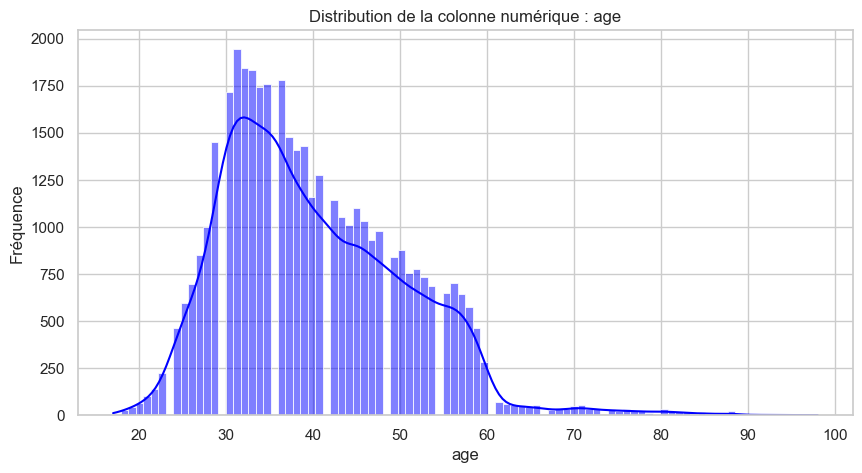

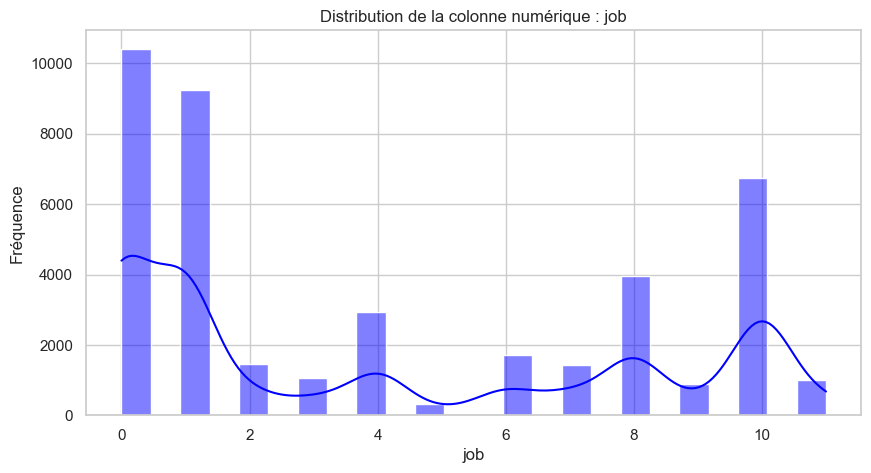

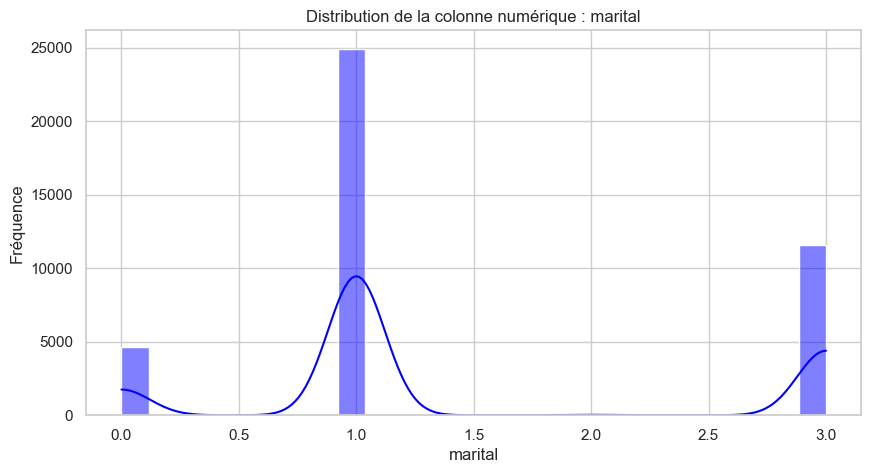

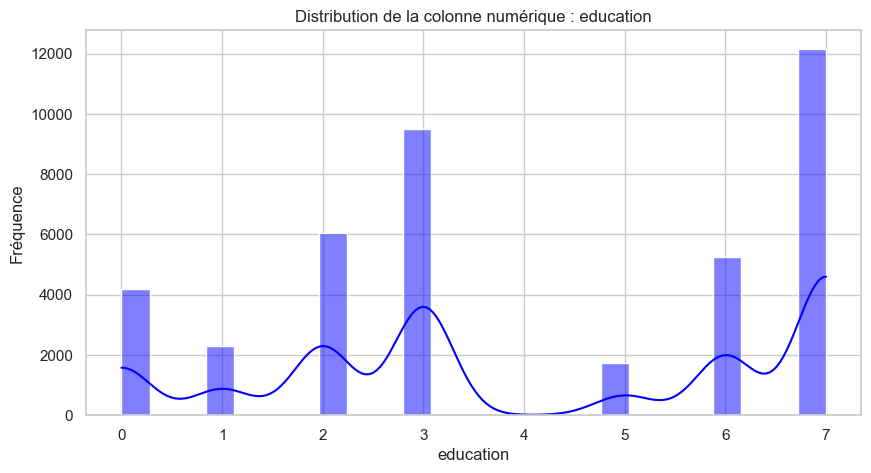

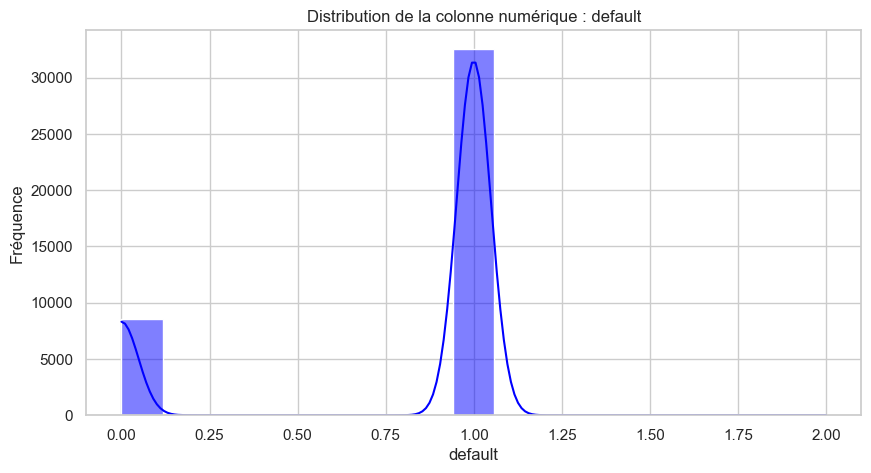

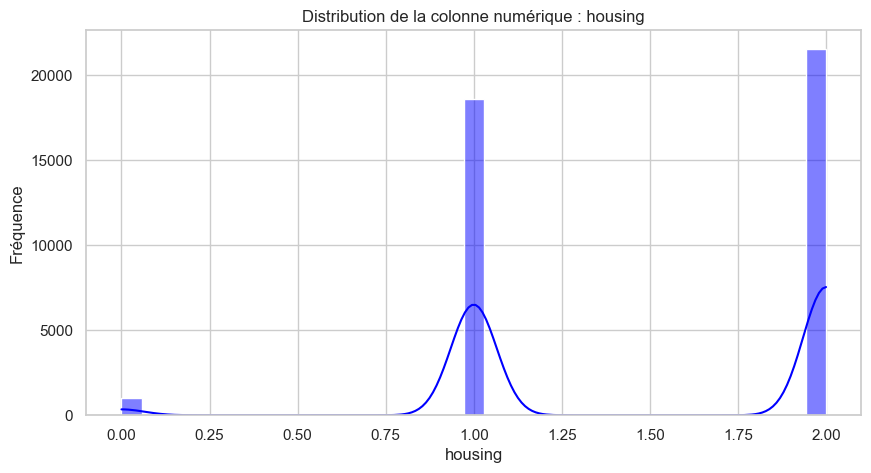

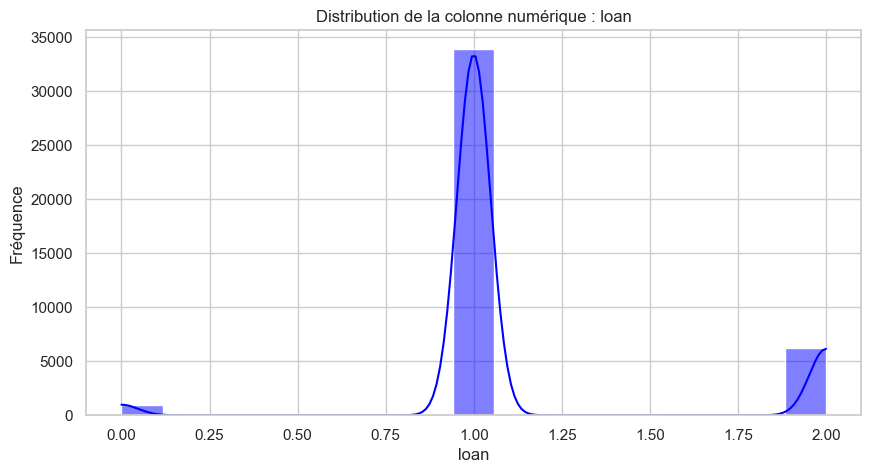

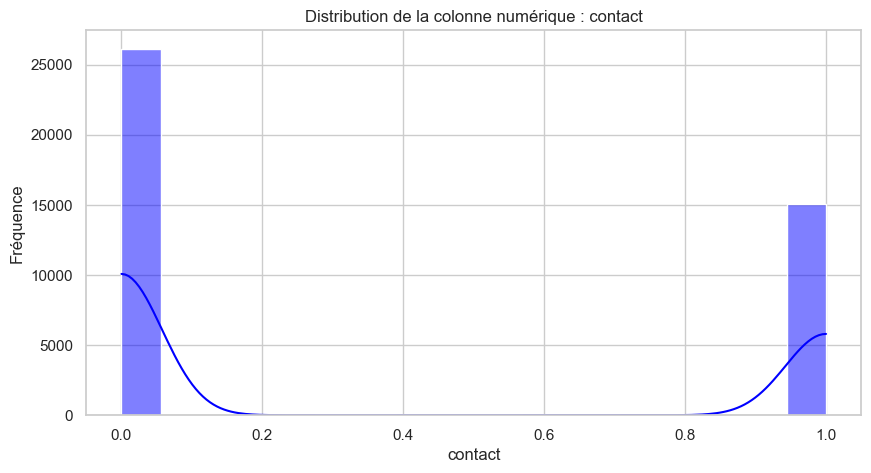

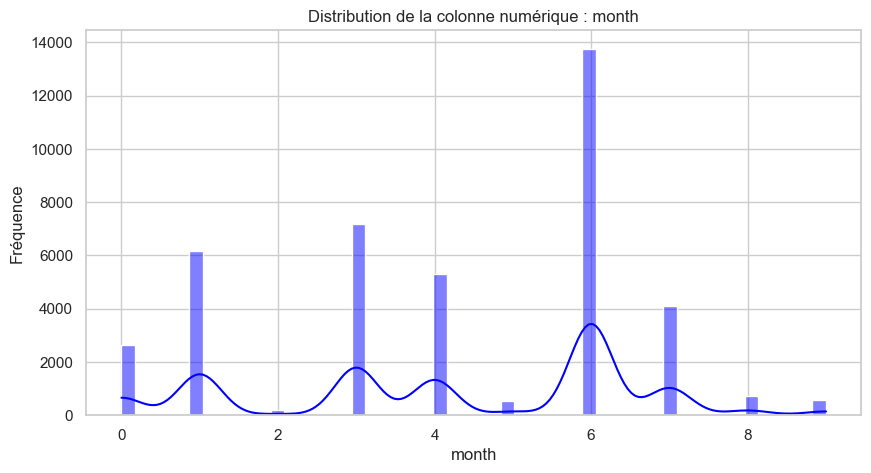

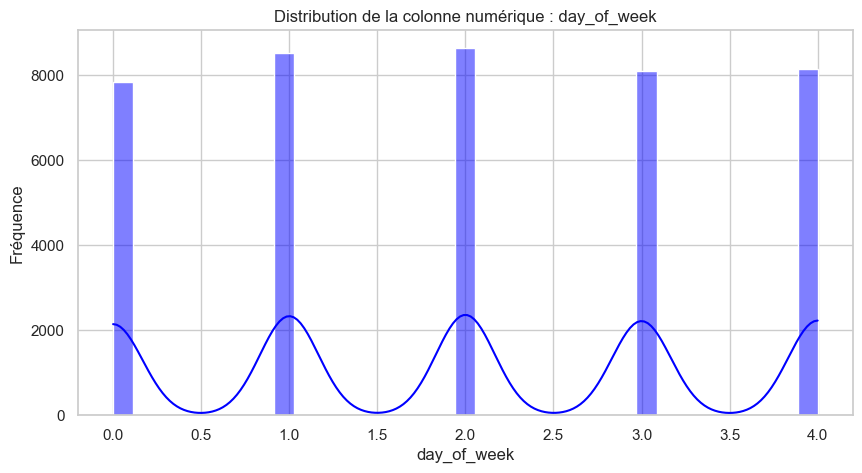

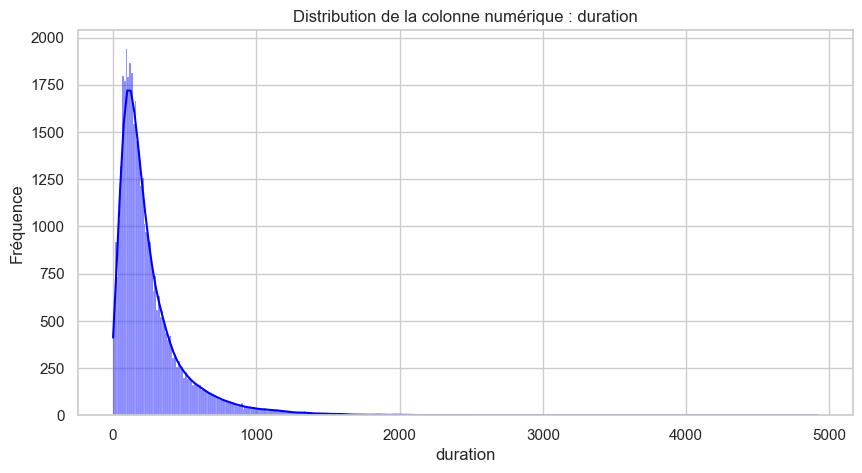

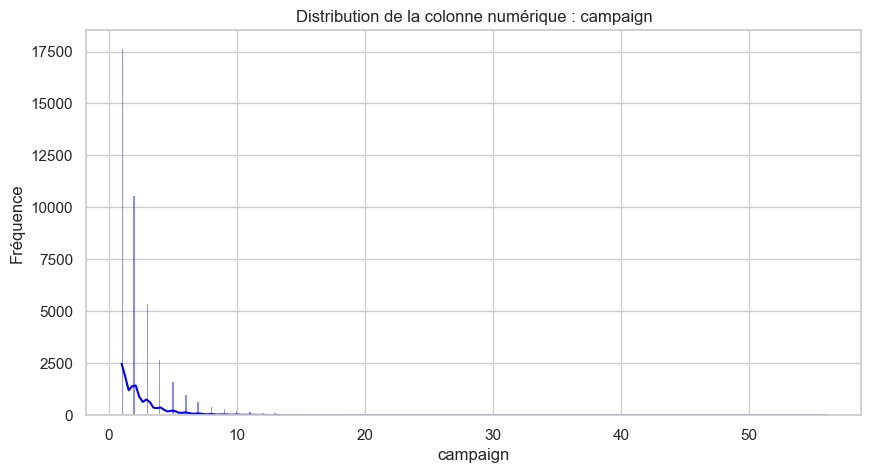

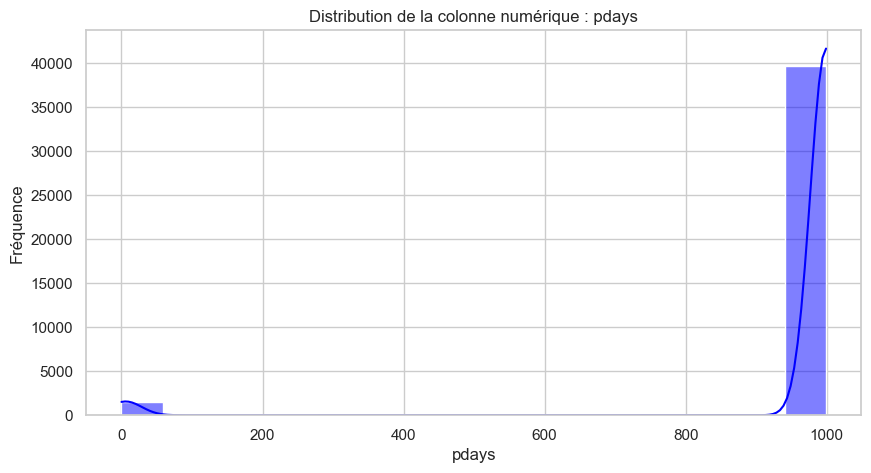

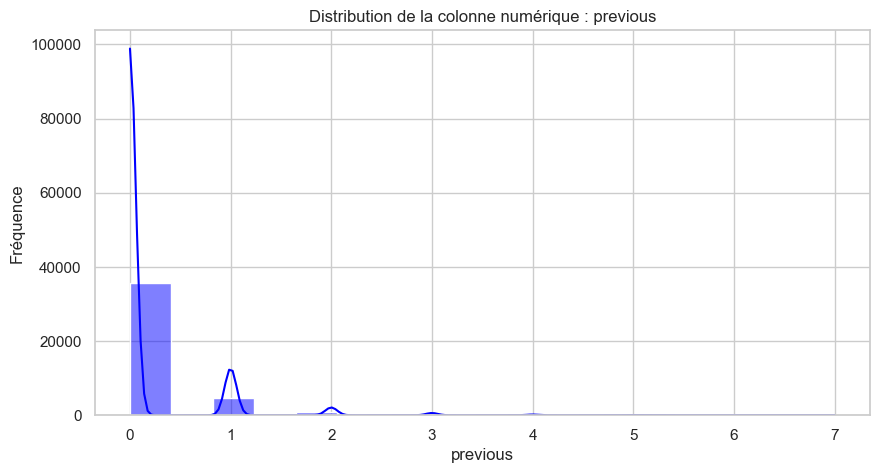

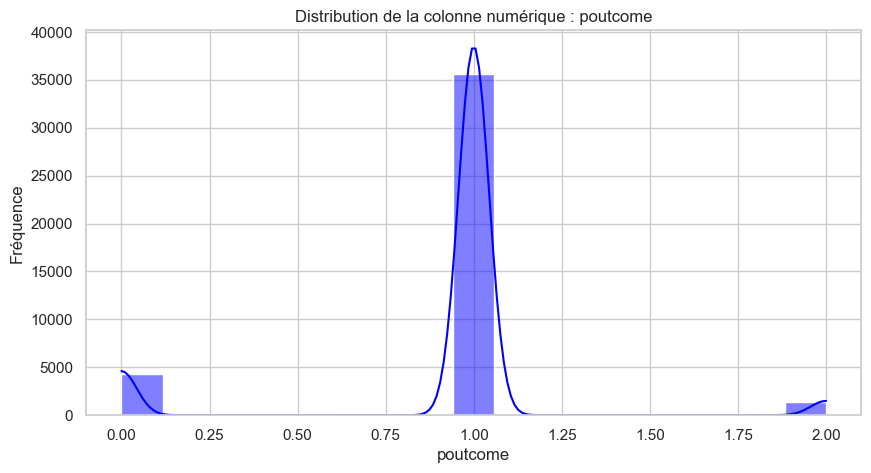

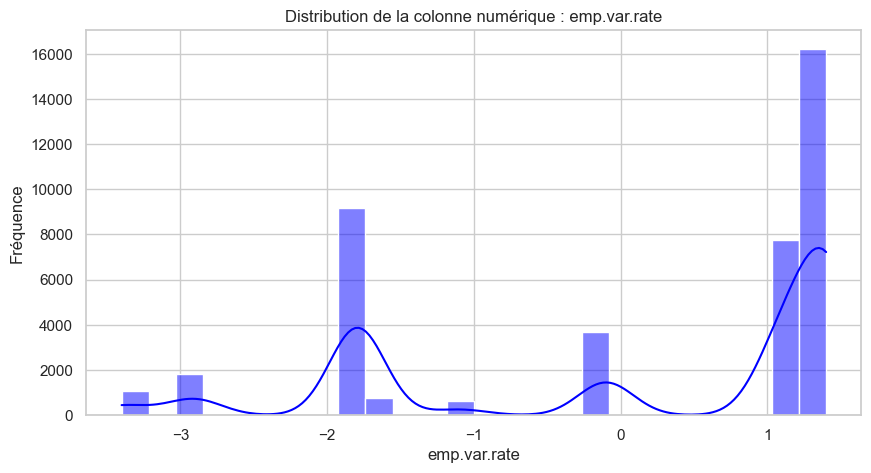

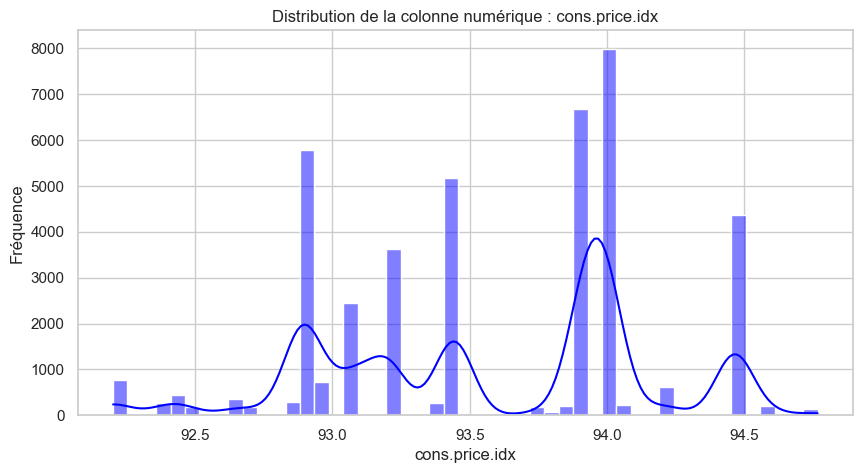

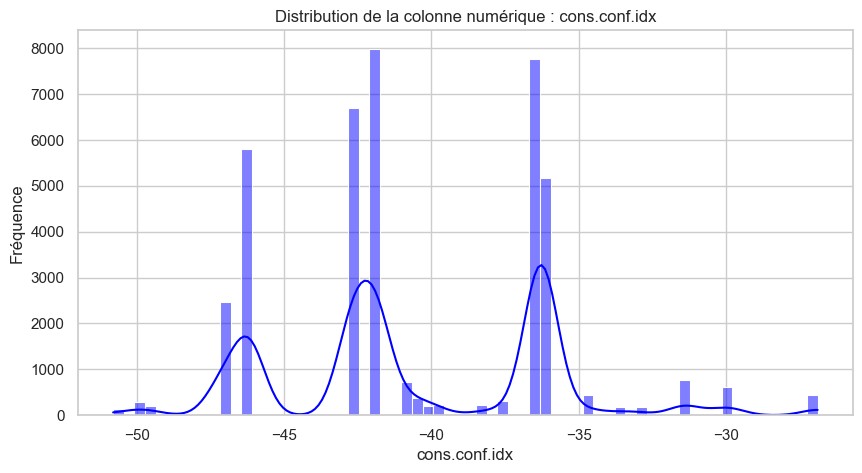

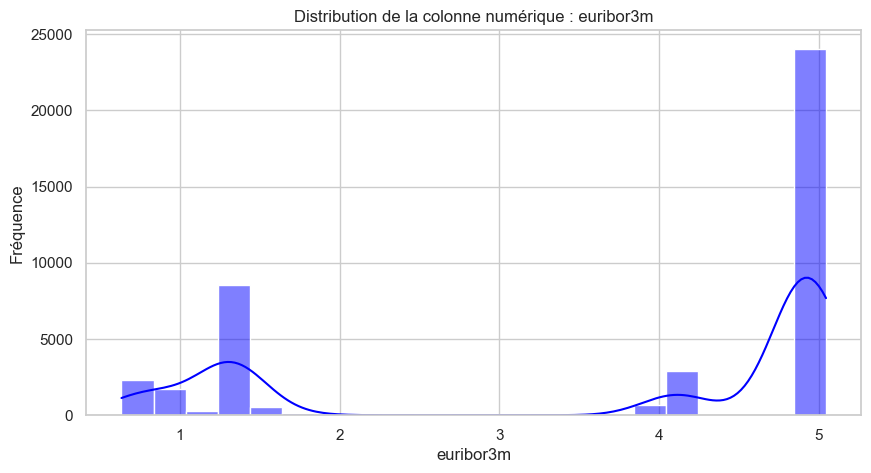

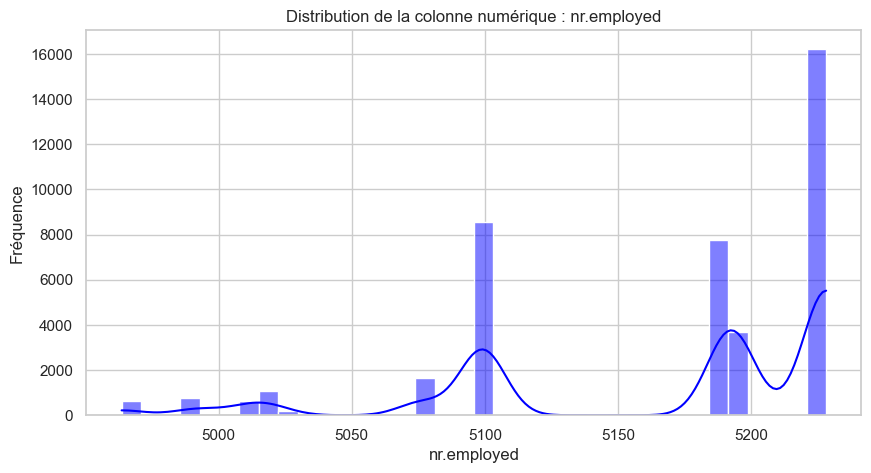

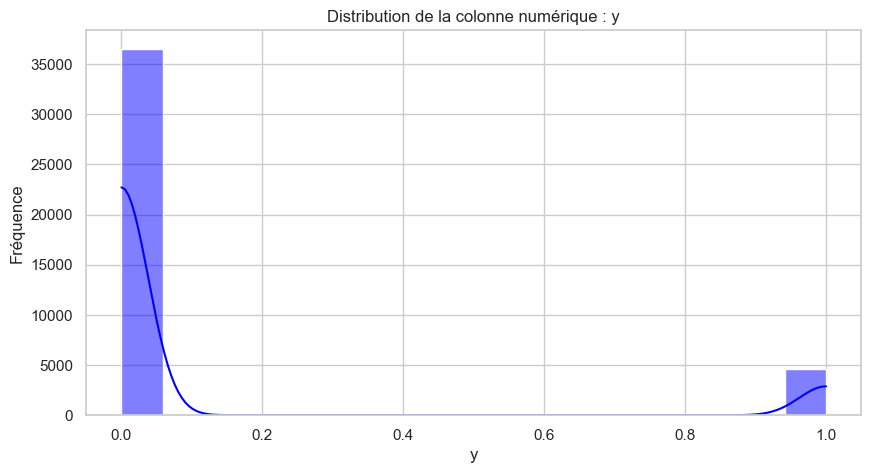

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Séparer les colonnes numériques et catégorielles
numeric_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_imputed.select_dtypes(include=['object']).columns

# Définir le style de Seaborn
sns.set(style="whitegrid")

# Tracer la distribution des colonnes numériques
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_imputed, x=col, kde=True, color='blue')
    plt.title(f"Distribution de la colonne numérique : {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")
    plt.show()

# Tracer la distribution des colonnes catégorielles
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_imputed, x=col, palette='viridis', order=df_imputed[col].value_counts().index)
    plt.title(f"Distribution de la colonne catégorielle : {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d'occurrences")
    plt.xticks(rotation=45)
    plt.show()


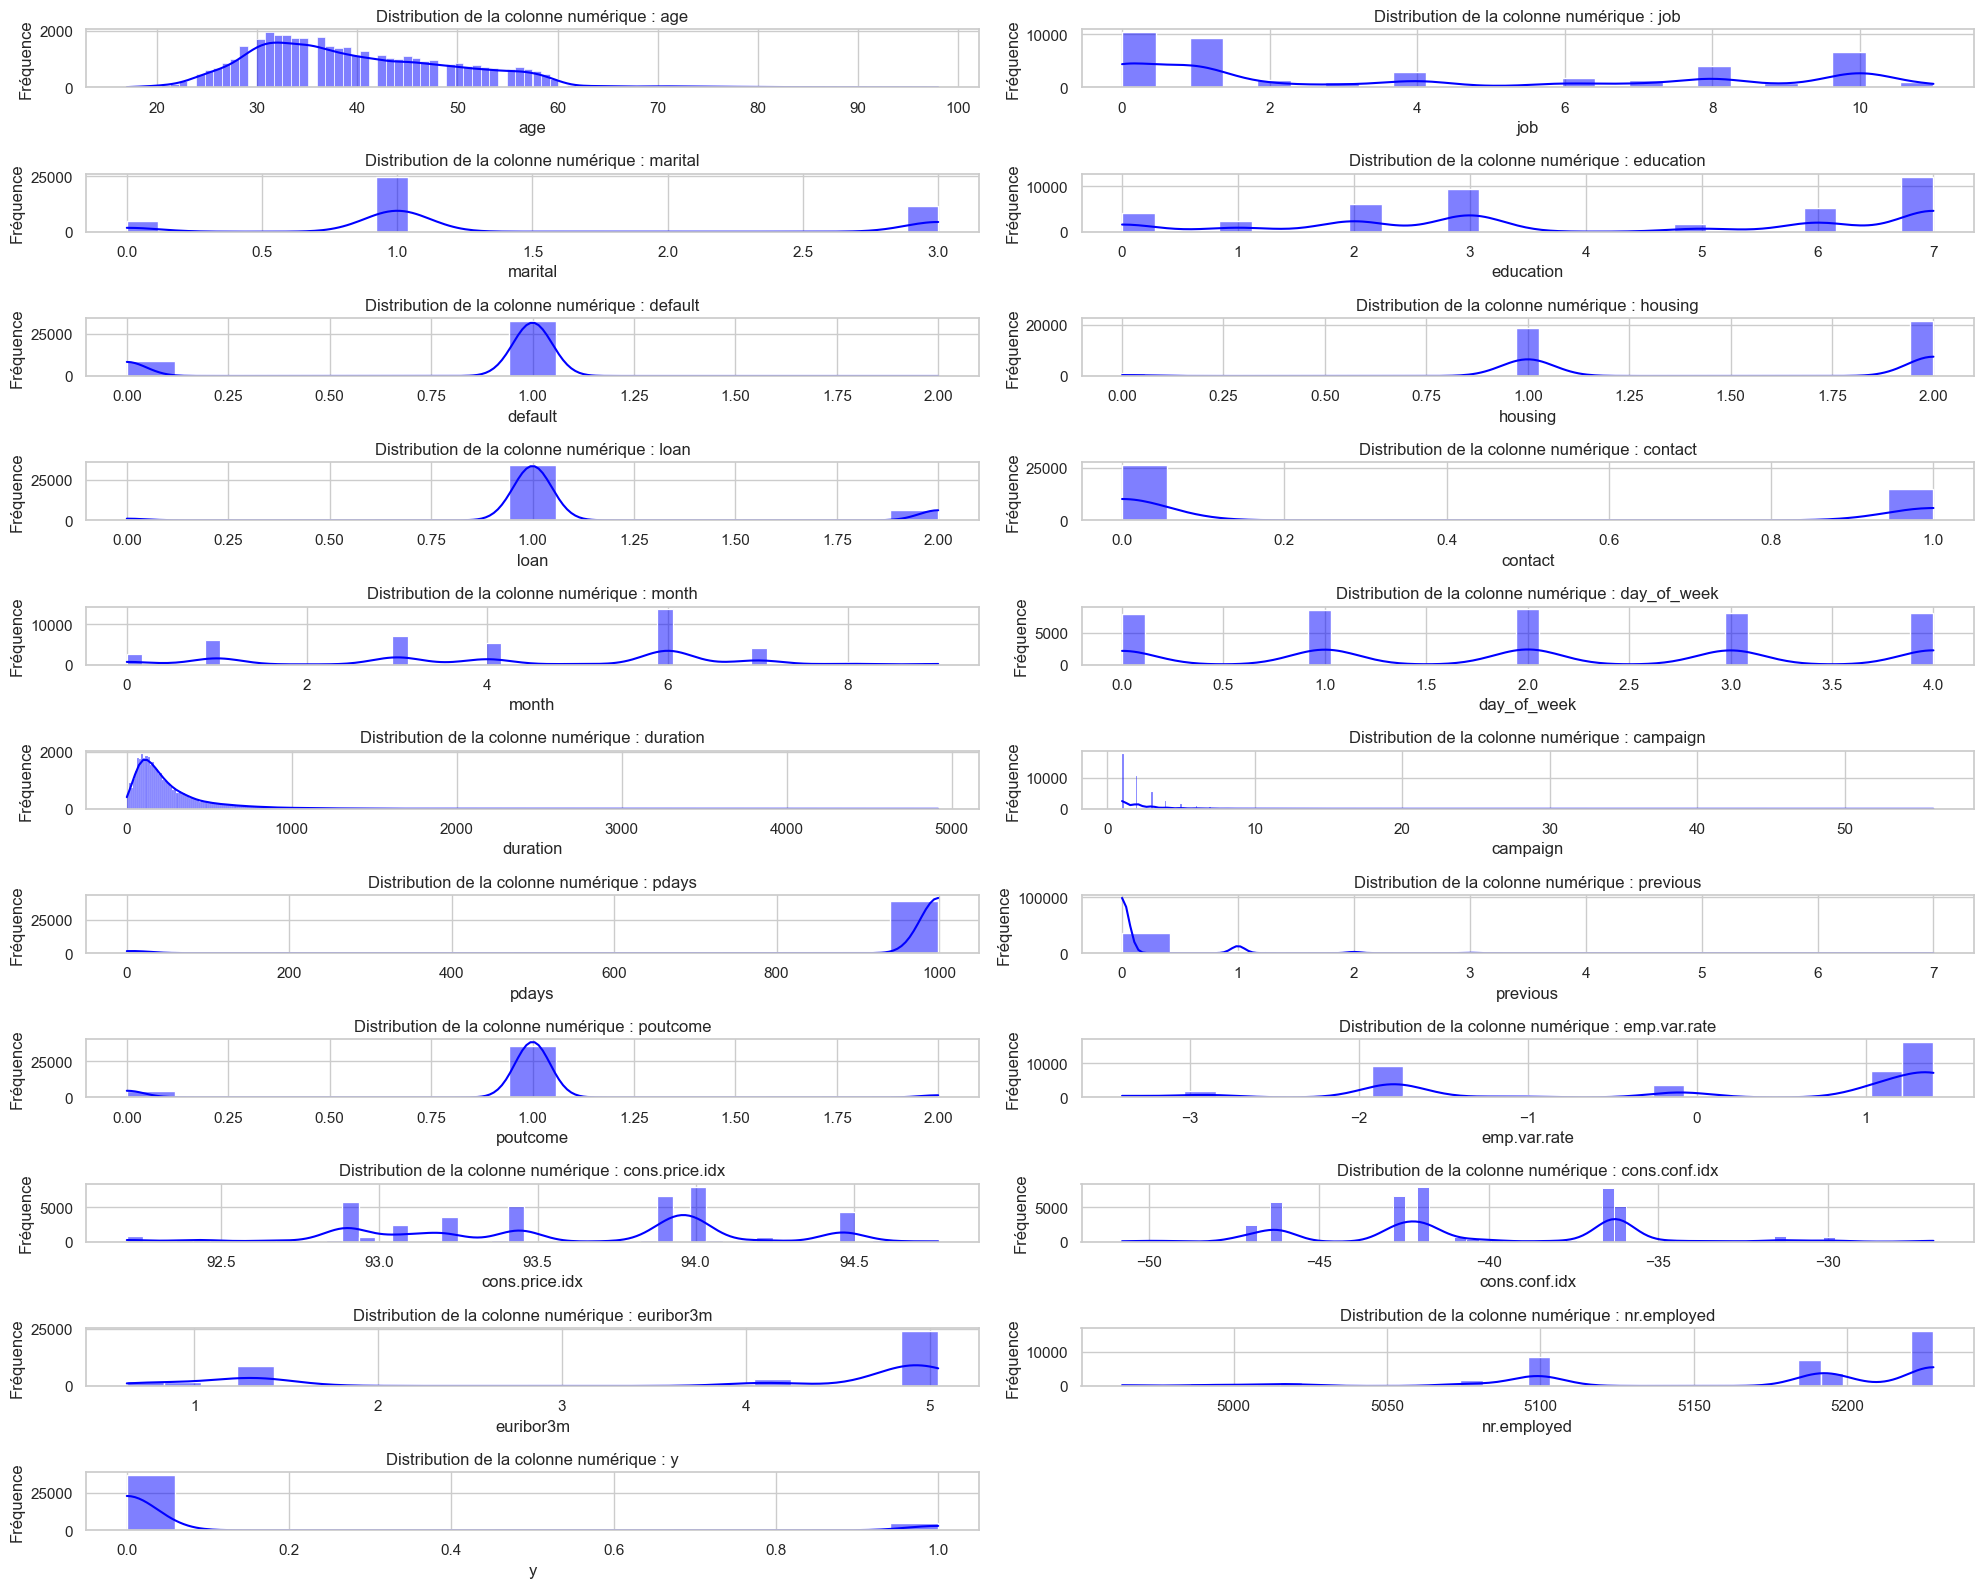

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Séparer les colonnes numériques et catégorielles
numeric_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_imputed.select_dtypes(include=['object']).columns

# Définir la taille de la figure et le style
plt.figure(figsize=(20, 30))
sns.set(style="whitegrid")

# Tracer la distribution des colonnes numériques
num_plots = len(numeric_cols)
cat_plots = len(categorical_cols)
total_plots = num_plots + cat_plots

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(total_plots, 2, i)
    sns.histplot(data=df_imputed, x=col, kde=True, color='blue')
    plt.title(f"Distribution de la colonne numérique : {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

# Tracer la distribution des colonnes catégorielles
for j, col in enumerate(categorical_cols, 1):
    plt.subplot(total_plots, 2, num_plots + j)
    sns.countplot(data=df_imputed, x=col, palette='viridis', order=df_imputed[col].value_counts().index)
    plt.title(f"Distribution de la colonne catégorielle : {col}")
    plt.xlabel(col)
    plt.ylabel("Nombre d'occurrences")
    plt.xticks(rotation=45)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


Valeurs manquantes après nettoyage :
age                     0
duration                0
campaign                0
pdays               39673
previous                0
poutcome                0
emp.var.rate            0
cons.price.idx          0
cons.conf.idx           0
euribor3m               0
nr.employed             0
y                       0
pdays_no_contact        0
job_1.0                 0
job_2.0                 0
job_3.0                 0
job_4.0                 0
job_5.0                 0
job_6.0                 0
job_7.0                 0
job_8.0                 0
job_9.0                 0
job_10.0                0
job_11.0                0
marital_1.0             0
marital_2.0             0
marital_3.0             0
education_1.0           0
education_2.0           0
education_3.0           0
education_4.0           0
education_5.0           0
education_6.0           0
education_7.0           0
default_1.0             0
default_2.0             0
housing_1.0             0
h

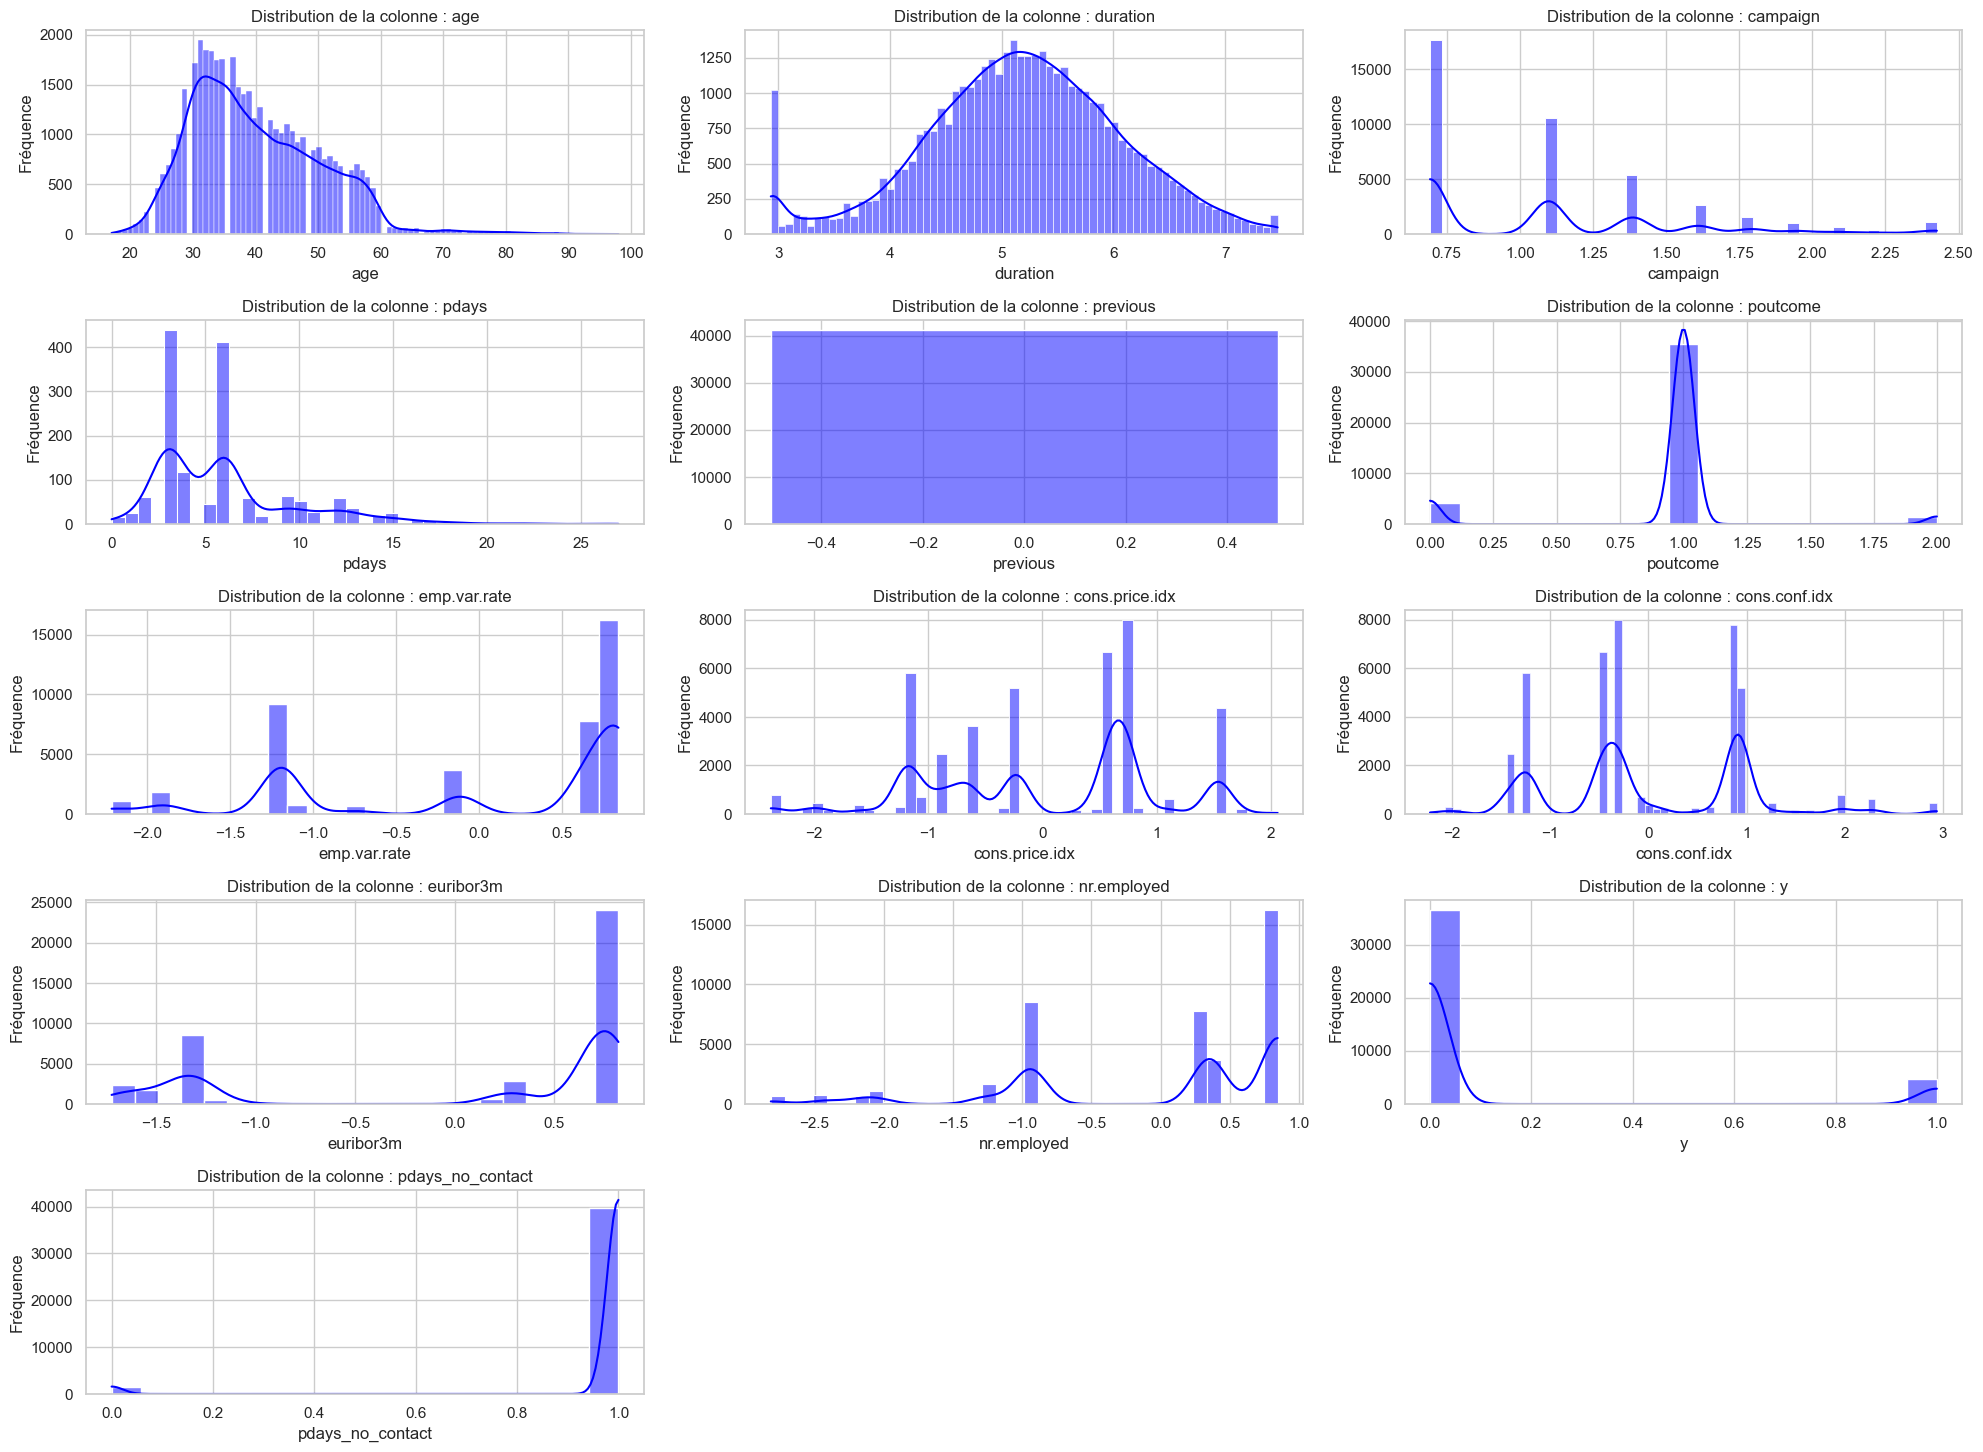

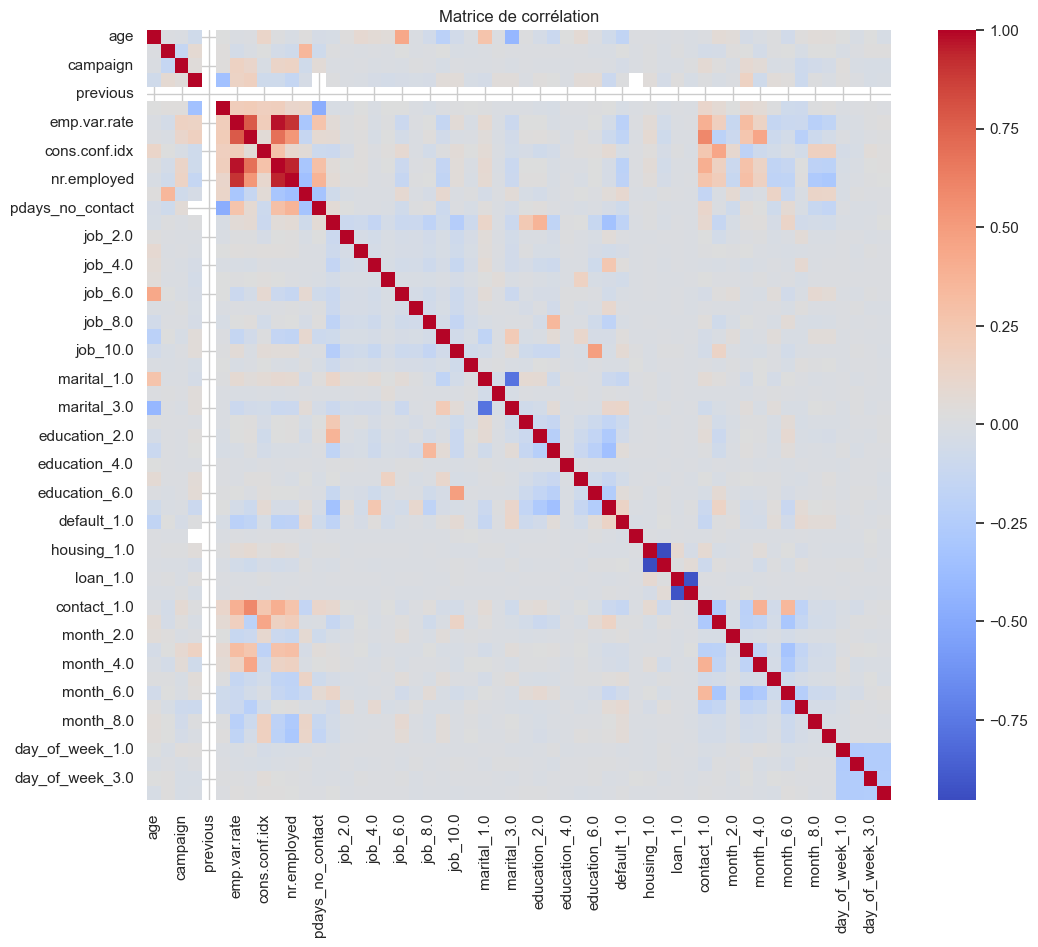

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Copier le DataFrame imputé pour les transformations
df = df_imputed.copy()

# Étape 1 : Transformation logarithmique des variables asymétriques
# Justification : Réduire l'impact des valeurs extrêmes sans perdre d'informations importantes.
asymmetric_cols = ['duration', 'campaign', 'previous']
for col in asymmetric_cols:
    df[col] = np.log1p(df[col])  # log1p(x) = log(1 + x)



# Étape 3 : Normalisation des variables économiques
# Justification : Les variables économiques sont sur des échelles différentes, donc une normalisation est nécessaire.
scaler = StandardScaler()
economic_features = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
df[economic_features] = scaler.fit_transform(df[economic_features])

# Étape 4 : Encodage One-Hot des variables catégorielles
# Justification : Utiliser One-Hot Encoding pour convertir les variables catégorielles en variables numériques.
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Étape 5 : Traitement des outliers
# Justification : Au lieu de supprimer les outliers, nous les limitons aux bornes calculées pour minimiser leur impact sans perdre d'informations.
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

outlier_cols = ['duration', 'campaign', 'previous']
for col in outlier_cols:
    treat_outliers(df, col)

# Étape 6 : Vérification des valeurs manquantes
print("Valeurs manquantes après nettoyage :")
print(df.isnull().sum())

# Étape 7 : Analyse des distributions des variables après transformation
# Justification : Visualiser la distribution des variables pour s'assurer que les transformations ont corrigé les asymétries.
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(7, 3, i)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution de la colonne : {col}")
    plt.xlabel(col)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

# Étape 8 : Analyse des corrélations
# Justification : Visualiser les corrélations entre les variables pour détecter d'éventuelles multicolinéarités.
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()
